In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [2]:
df1 = pd.read_csv("dataset_All_normalized.csv")
class_name = 'Occupancy'

In [3]:
df1.head()

,Temperature,Light,CO2,HumidityRatio,Day,Afternoon,Evening,Night,Weekday,Weekend,Occupancy
0,0.869029,0.603964,0.208231,0.549737,0,1,0,0,1,0,1
1,0.872357,0.596946,0.215163,0.551972,0,1,0,0,1,0,1
2,0.874576,0.591029,0.220898,0.549997,0,1,0,0,1,0,1
3,0.873190,0.509582,0.224045,0.544374,0,1,0,0,1,0,1
4,0.879014,0.504267,0.226675,0.550376,0,1,0,0,1,0,1


In [4]:
df = df1.drop(columns=['Temperature', 'HumidityRatio'])
df.head()

,Light,CO2,Day,Afternoon,Evening,Night,Weekday,Weekend,Occupancy
0,0.603964,0.208231,0,1,0,0,1,0,1
1,0.596946,0.215163,0,1,0,0,1,0,1
2,0.591029,0.220898,0,1,0,0,1,0,1
3,0.509582,0.224045,0,1,0,0,1,0,1
4,0.504267,0.226675,0,1,0,0,1,0,1


In [5]:
trash = df1.drop(columns=['Day', 'Afternoon', 'Evening', 'Night', 'Weekday', 'Weekend'])
trash.head()

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,0.869029,0.603964,0.208231,0.549737,1
1,0.872357,0.596946,0.215163,0.551972,1
2,0.874576,0.591029,0.220898,0.549997,1
3,0.873190,0.509582,0.224045,0.544374,1
4,0.879014,0.504267,0.226675,0.550376,1


In [6]:
all01 = df1.drop(columns=['Temperature', 'Light', 'CO2', 'HumidityRatio'])
all01.head()

,Day,Afternoon,Evening,Night,Weekday,Weekend,Occupancy
0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,1
2,0,1,0,0,1,0,1
3,0,1,0,0,1,0,1
4,0,1,0,0,1,0,1


## Classificazioni


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

## Data Partitioning

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

In [63]:
attributes = [col for col in df1.columns if col != class_name]
X = df1[attributes].values
y = df1[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [64]:
X_train.shape

(14392, 10)

# - Feature Projection  

# Principal Component Analysis

In [94]:
from sklearn.decomposition import PCA
from itertools import product
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as yPCA

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz

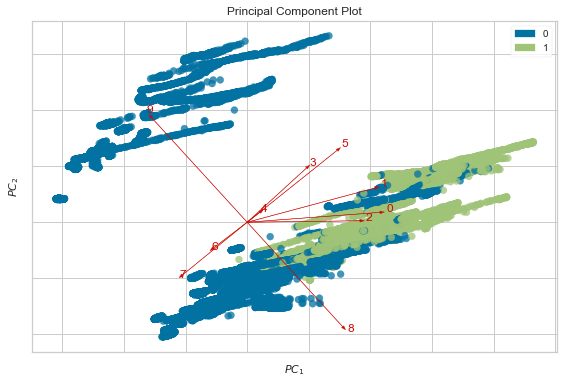

In [81]:
from yellowbrick.features import PCA


classes = ['0', '1']

visualizer = PCA(scale=True, classes=classes, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.show()

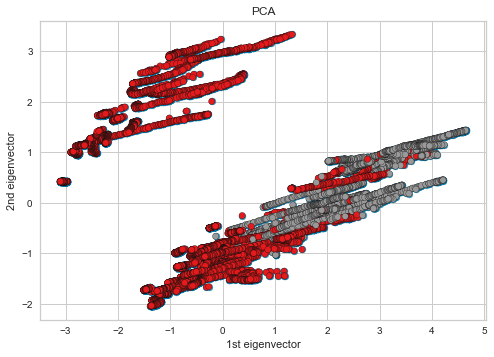

In [91]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

In [100]:
def test_PCA_Boundary_train(dataset, classifier, title):
    attributes = [col for col in dataset.columns if col != class_name]
    X = dataset[attributes].values
    y = dataset[class_name].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
    
    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)

    print(X_train_pca.shape)
    #plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    #plt.show()
    
    X_test_pca = pca.transform(X_test)

    viz = DecisionViz(
        classifier, title=title,
        features=['Feature One', 'Feature Two'], classes=['0', '1']
    )
    viz.fit(X_train_pca, y_train)
    viz.draw(X_test_pca, y_test)
    #viz.draw(X_train_pca, y_train)
    viz.show()

    print("_________________________________________________________________")
def test_PCA_Boundary_test(dataset, classifier, title):
    attributes = [col for col in dataset.columns if col != class_name]
    X = dataset[attributes].values
    y = dataset[class_name].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
    
    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)

    print(X_train_pca.shape)
    #plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    #plt.show()
    
    X_test_pca = pca.transform(X_test)

    viz = DecisionViz(
        classifier, title=title,
        features=['Feature One', 'Feature Two'], classes=['0', '1']
    )
    viz.fit(X_train_pca, y_train)
    #viz.draw(X_test_pca, y_test)
    viz.draw(X_train_pca, y_train)
    viz.show()

    print("_________________________________________________________________")

def result_PCA(dataset, classifier):
    attributes = [col for col in dataset.columns if col != class_name]
    X = dataset[attributes].values
    y = dataset[class_name].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
    
    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)

    print(X_train_pca.shape)
    #plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    #plt.show()
    
    X_test_pca = pca.transform(X_test)

    clf = classifier
    clf.fit(X_train_pca, y_train)

    y_pred = clf.predict(X_test_pca)

    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    print("_________________________________________________________________")    

## Plot e Risultati Senza Temperature e Light

(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


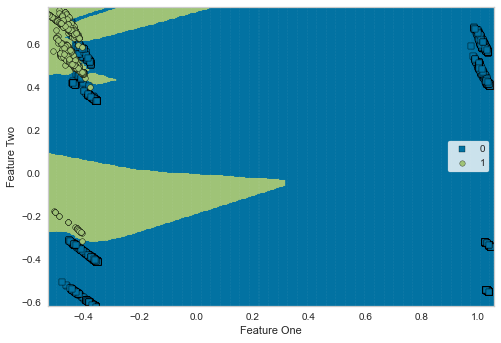

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


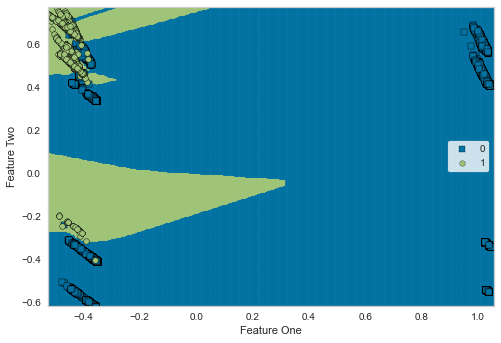

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


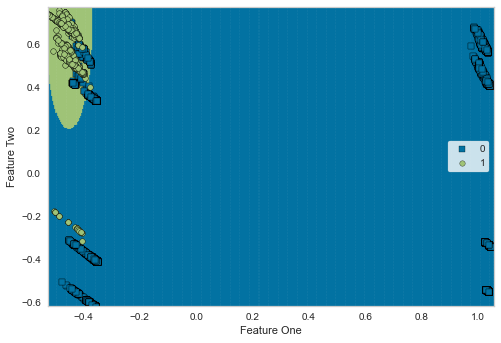

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


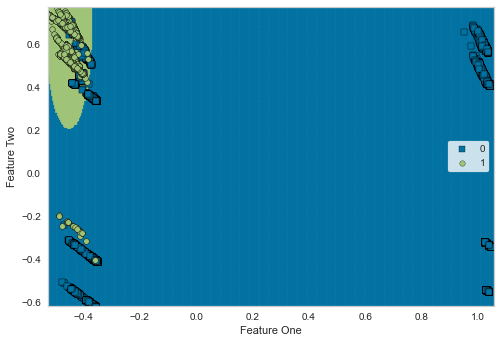

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


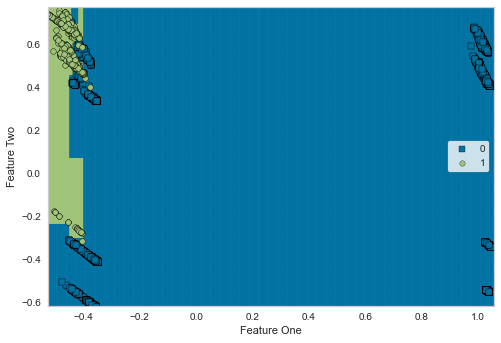

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


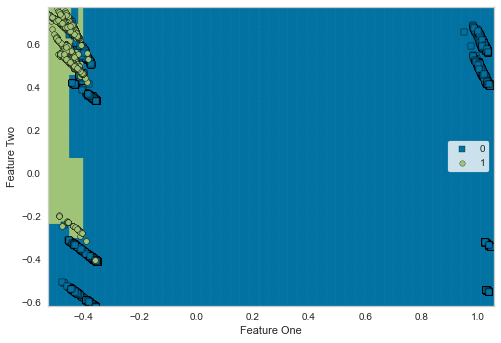

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


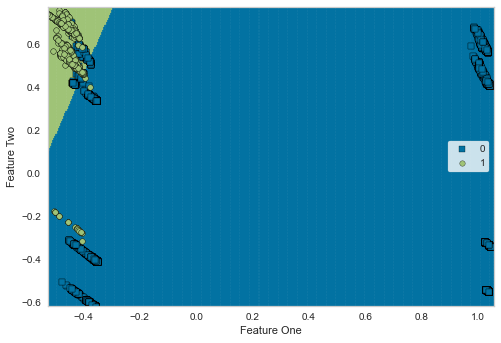

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


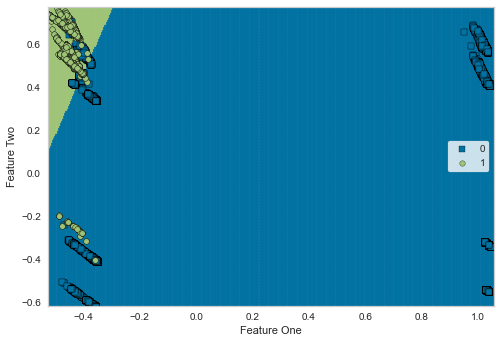

_________________________________________________________________


In [98]:
test_PCA_Boundary_train(df, KNeighborsClassifier(n_neighbors=5), "KNN")
test_PCA_Boundary_test(df, KNeighborsClassifier(n_neighbors=5), "KNN")
test_PCA_Boundary_train(df, GaussianNB(), "Naive Gauss")
test_PCA_Boundary_test(df, GaussianNB(), "Naive Gauss")
test_PCA_Boundary_train(df, DecisionTreeClassifier(min_samples_leaf=3, random_state=1000), "Decision Tree")
test_PCA_Boundary_test(df, DecisionTreeClassifier(min_samples_leaf=3, random_state=1000), "Decision Tree")
test_PCA_Boundary_train(df, LogisticRegression(random_state=0), "Logistic Regression")
test_PCA_Boundary_test(df, LogisticRegression(random_state=0), "Logistic Regression")

In [101]:
result_PCA(df, KNeighborsClassifier(n_neighbors=5))

result_PCA(df, GaussianNB())

result_PCA(df, DecisionTreeClassifier(min_samples_leaf=3, random_state=1000))

result_PCA(df, LogisticRegression(random_state=0))


(14392, 2)
Accuracy 0.9904345006485085
_________________________________________________________________
(14392, 2)
Accuracy 0.9562256809338522
_________________________________________________________________
(14392, 2)
Accuracy 0.9868677042801557
_________________________________________________________________
(14392, 2)
Accuracy 0.961413748378729
_________________________________________________________________


## Plot e Risulati su tutto il dataset

(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


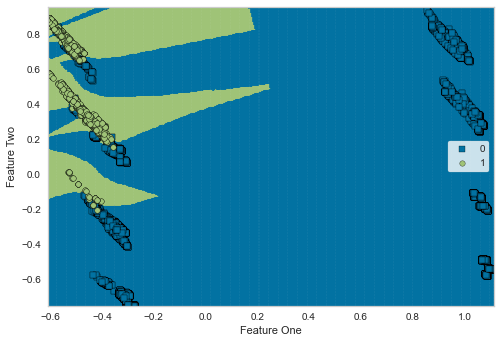

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


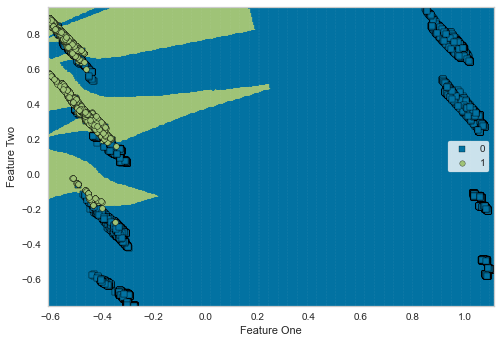

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


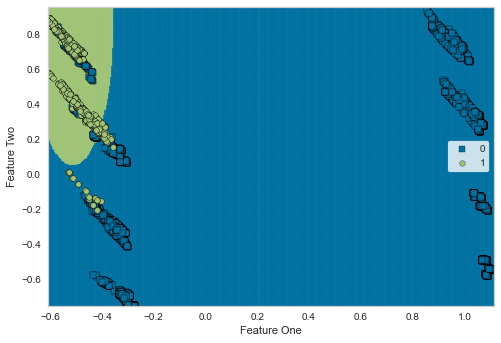

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


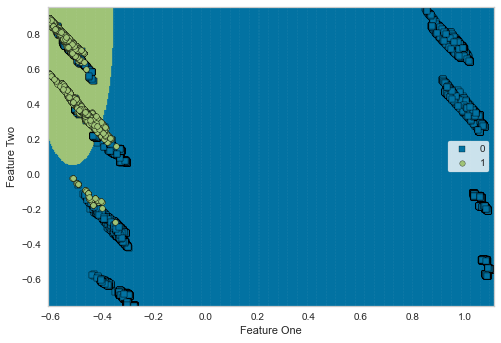

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


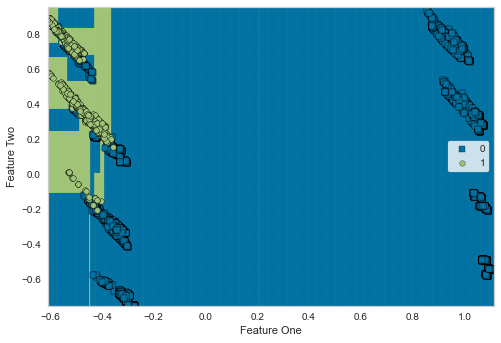

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


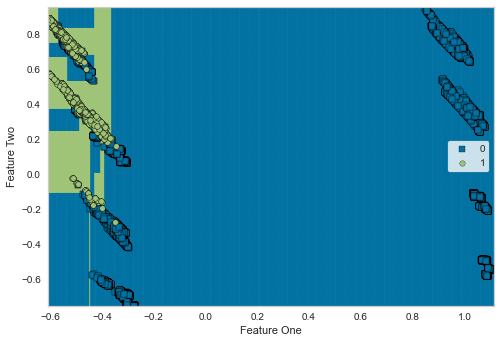

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


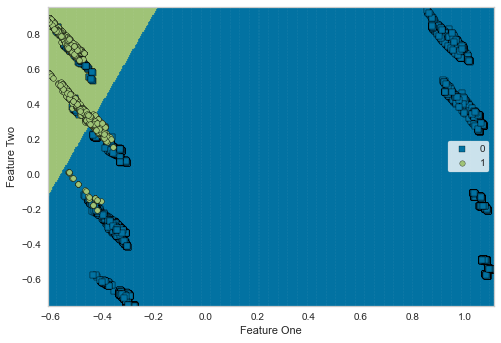

_________________________________________________________________
(14392, 2)


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


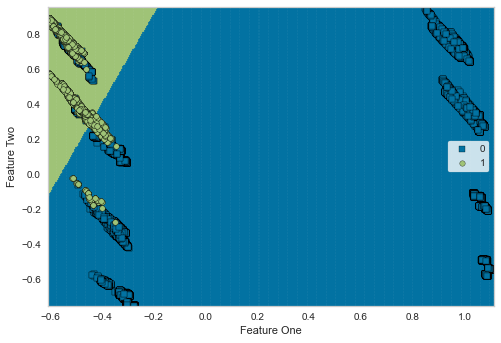

_________________________________________________________________


In [99]:
test_PCA_Boundary_train(df1, KNeighborsClassifier(n_neighbors=5), "KNN")
test_PCA_Boundary_test(df1, KNeighborsClassifier(n_neighbors=5), "KNN")
test_PCA_Boundary_train(df1, GaussianNB(), "Naive Gauss")
test_PCA_Boundary_test(df1, GaussianNB(), "Naive Gauss")
test_PCA_Boundary_train(df1, DecisionTreeClassifier(min_samples_leaf=3, random_state=1000), "Decision Tree")
test_PCA_Boundary_test(df1, DecisionTreeClassifier(min_samples_leaf=3, random_state=1000), "Decision Tree")
test_PCA_Boundary_train(df1, LogisticRegression(random_state=0), "Logistic Regression")
test_PCA_Boundary_test(df1, LogisticRegression(random_state=0), "Logistic Regression")

In [102]:
result_PCA(df1, KNeighborsClassifier(n_neighbors=5))

result_PCA(df1, GaussianNB())

result_PCA(df1, DecisionTreeClassifier(min_samples_leaf=3, random_state=1000))

result_PCA(df1, LogisticRegression(random_state=0))


(14392, 2)
Accuracy 0.9834630350194552
_________________________________________________________________
(14392, 2)
Accuracy 0.9505512321660181
_________________________________________________________________
(14392, 2)
Accuracy 0.981355382619974
_________________________________________________________________
(14392, 2)
Accuracy 0.9409857328145266
_________________________________________________________________


In [87]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

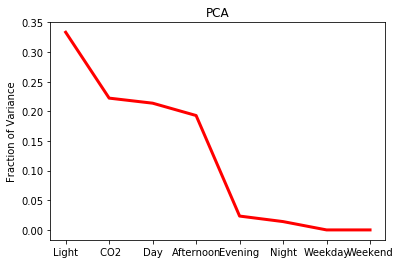

In [12]:
col_name = ['Light',' CO2', 'Day', 'Afternoon', 'Evening', 'Night','Weekday', 'Weekend']
plt.plot(PCA(n_components=8).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range(8), col_name)
plt.show()

#  - Feature Selection -

# Variance Threshold

It removes all features whose variance doesn’t meet some
threshold. By default, it removes all zero-variance features, i.e. features that have the
same value in all samples.

In [11]:
from sklearn.feature_selection import VarianceThreshold

In [12]:
attributes = [col for col in df1.columns if col != class_name]
X = df1[attributes].values
y = df1[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

In [14]:
def test_threshold(classifier):
    ran = [0.03, 0.04, 0.05, 0.10, 0.15, 0.18, 0.19, 0.2]
    print(classifier)
    for i in ran:
        print(i)
        sel = VarianceThreshold(i)
        X_train_sel = sel.fit_transform(X_train)

        print(X_train_sel.shape)
        X_test_sel = sel.transform(X_test)

        clf = classifier
        #DecisionTreeClassifier(min_samples_leaf=3, random_state=1000)
        clf.fit(X_train_sel, y_train)

        y_pred = clf.predict(X_test_sel)

        print('Accuracy %s' % accuracy_score(y_test, y_pred))
        print('F1-score %s' % f1_score(y_test, y_pred, average=None))
        print(classification_report(y_test, y_pred))

In [15]:
test_threshold(DecisionTreeClassifier(min_samples_leaf=3, random_state=1000))
test_threshold(KNeighborsClassifier(n_neighbors=5))
test_threshold(GaussianNB())
test_threshold(LogisticRegression(random_state=0))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1000, splitter='best')
0.03
(14392, 10)
Accuracy 0.9909208819714657
F1-score [0.99407783 0.98055556]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4730
           1       0.98      0.98      0.98      1438

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

0.04
(14392, 8)
Accuracy 0.9878404669260701
F1-score [0.9920744  0.97389488]
              precision    recall  f1-score   support

           0       0.99      0.99   

c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.993514915693904
F1-score [0.99576361 0.9861783 ]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4730
           1       0.98      0.99      0.99      1438

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

0.04
(14392, 8)
Accuracy 0.9904345006485085
F1-score [0.99375463 0.97957771]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4730
           1       0.98      0.98      0.98      1438

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

0.05
(14392, 6)
Accuracy 0.8793774319066148
F1-score [0.9251057  0.69025812]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      4730
           1       0.86

c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.7668612191958496
F1-score [0.86804918 0.        ]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4730
           1       0.00      0.00      0.00      1438

    accuracy                           0.77      6168
   macro avg       0.38      0.50      0.43      6168
weighted avg       0.59      0.77      0.67      6168

GaussianNB(priors=None, var_smoothing=1e-09)
0.03
(14392, 10)
Accuracy 0.8916990920881972
F1-score [0.92402184 0.81151242]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      4730
           1       0.68      1.00      0.81      1438

    accuracy                           0.89      6168
   macro avg       0.84      0.93      0.87      6168
weighted avg       0.93      0.89      0.90      6168

0.04
(14392, 8)
Accuracy 0.8916990920881972
F1-score [0.92402184 0.81151242]
              precision    recall  f1-score   support

           0       1.00      0

c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



F1-score [0.76064457 0.61152456]
              precision    recall  f1-score   support

           0       1.00      0.61      0.76      4730
           1       0.44      1.00      0.61      1438

    accuracy                           0.70      6168
   macro avg       0.72      0.81      0.69      6168
weighted avg       0.87      0.70      0.73      6168

0.2
(14392, 2)
Accuracy 0.517023346303502
F1-score [0.54034871 0.4912041 ]
              precision    recall  f1-score   support

           0       1.00      0.37      0.54      4730
           1       0.33      1.00      0.49      1438

    accuracy                           0.52      6168
   macro avg       0.66      0.69      0.52      6168
weighted avg       0.84      0.52      0.53      6168

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random

c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##  Risultati per vari thresholds

In [37]:
thresholds = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.15, 0.16, 0.19]
for i in thresholds:
    sel = VarianceThreshold(i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train, y_train)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    
    clf = GaussianNB()
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('Gauss - Accuracy %s' % accuracy_score(y_test, y_pred))
    
    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=1000)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('DecisionTree - Accuracy %s' % accuracy_score(y_test, y_pred))
    
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('Logistic - Accuracy %s' % accuracy_score(y_test, y_pred))
    print("--------------------------------------------------")


0.02
(14392, 10)
KNN - Accuracy 0.993514915693904
Gauss - Accuracy 0.8916990920881972
DecisionTree - Accuracy 0.9909208819714657
Logistic - Accuracy 0.9894617380025941
--------------------------------------------------
0.04
(14392, 8)
KNN - Accuracy 0.9904345006485085
Gauss - Accuracy 0.8916990920881972
DecisionTree - Accuracy 0.9878404669260701
Logistic - Accuracy 0.9881647211413749
--------------------------------------------------
0.06
(14392, 6)
KNN - Accuracy 0.8793774319066148
Gauss - Accuracy 0.7037937743190662
DecisionTree - Accuracy 0.8871595330739299
Logistic - Accuracy 0.8871595330739299
--------------------------------------------------
0.08
(14392, 6)
KNN - Accuracy 0.8793774319066148
Gauss - Accuracy 0.7037937743190662
DecisionTree - Accuracy 0.8871595330739299
Logistic - Accuracy 0.8871595330739299
--------------------------------------------------
0.1
(14392, 6)
KNN - Accuracy 0.8793774319066148
Gauss - Accuracy 0.7037937743190662
DecisionTree - Accuracy 0.8871595330739

# Univariate Feature Selection

It selects the best features based on univariate statistical
tests.

In [20]:
from sklearn.feature_selection import SelectKBest

In [32]:
sel = SelectKBest(k=5)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape
X_test_sel = sel.transform(X_test)

### Risultati scelta k

In [39]:
for i in range(1, 9):
    sel = SelectKBest(k=i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train, y_train)
    X_train_sel.shape
    X_test_sel = sel.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    
    clf = GaussianNB()
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('Gauss - Accuracy %s' % accuracy_score(y_test, y_pred))
    
    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=1000)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('DecisionTree - Accuracy %s' % accuracy_score(y_test, y_pred))
    
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('Logistic - Accuracy %s' % accuracy_score(y_test, y_pred))
    print("--------------------------------------------------")


1
KNN - Accuracy 0.9870298313878081
Gauss - Accuracy 0.9695201037613489
DecisionTree - Accuracy 0.9858949416342413
Logistic - Accuracy 0.9820038910505836
--------------------------------------------------
2
KNN - Accuracy 0.9901102464332037
Gauss - Accuracy 0.9646562905317769
DecisionTree - Accuracy 0.9883268482490273
Logistic - Accuracy 0.9845979247730221
--------------------------------------------------
3
KNN - Accuracy 0.9922178988326849
Gauss - Accuracy 0.9664396887159533
DecisionTree - Accuracy 0.9896238651102465
Logistic - Accuracy 0.9884889753566797
--------------------------------------------------
4
KNN - Accuracy 0.9922178988326849
Gauss - Accuracy 0.9627107652399481
DecisionTree - Accuracy 0.9902723735408561
Logistic - Accuracy 0.9884889753566797
--------------------------------------------------
5
KNN - Accuracy 0.9930285343709468
Gauss - Accuracy 0.9682230869001297
DecisionTree - Accuracy 0.9917315175097277
Logistic - Accuracy 0.9891374837872893
--------------------------

# Recursive Feature Elimination

In [40]:
from sklearn.feature_selection import SelectFromModel

### Calcolo Risultati - RFE

In [48]:
#clf = KNeighborsClassifier(n_neighbors=5)
#sel = SelectFromModel(clf)
#X_train_sel = sel.fit_transform(X_train, y_train)
#print(X_train_sel.shape)
#X_test_sel = sel.transform(X_test)
#clf.fit(X_train_sel, y_train)
#y_pred = clf.predict(X_test_sel)
#print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))

#clf = GaussianNB()
#sel = SelectFromModel(clf)
#X_train_sel = sel.fit_transform(X_train, y_train)
#print(X_train_sel.shape)
#X_test_sel = sel.transform(X_test)
#clf.fit(X_train_sel, y_train)
#y_pred = clf.predict(X_test_sel)
#print('Gauss - Accuracy %s' % accuracy_score(y_test, y_pred))

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=1000)
sel = SelectFromModel(clf)
X_train_sel = sel.fit_transform(X_train, y_train)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)
print('DecisionTree - Accuracy %s' % accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0)
sel = SelectFromModel(clf)
X_train_sel = sel.fit_transform(X_train, y_train)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)
print('Logistic - Accuracy %s' % accuracy_score(y_test, y_pred))
print("--------------------------------------------------")

(14392, 1)
DecisionTree - Accuracy 0.9858949416342413
(14392, 2)
Logistic - Accuracy 0.9845979247730221
--------------------------------------------------


c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


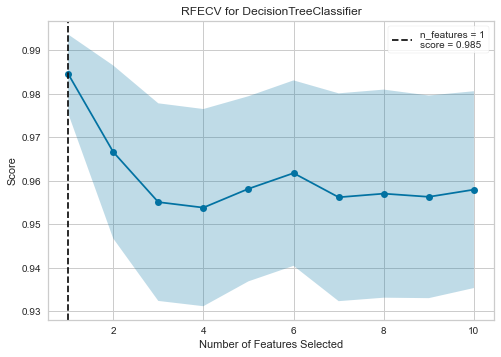

In [56]:
from yellowbrick.model_selection import RFECV


# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(DecisionTreeClassifier(min_samples_leaf=3, random_state=1000))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


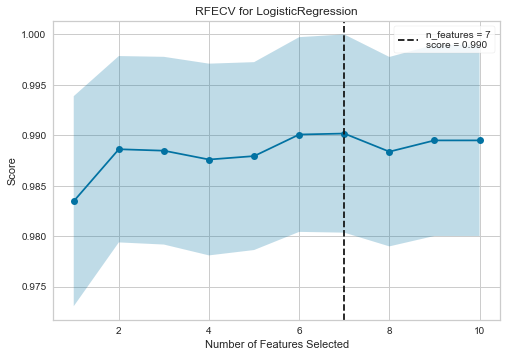

In [55]:
# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(LogisticRegression(random_state=0))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()     